# Notebook 2: Geophysical Fluid Dynamics Basics  
### Assignment 1 - Atmospheric Dynamics and Aerosol Science

**Course:** RSG 5013 Aerosol Remote Sensing and Atmospheric Dynamics Practical  
**Instructor:** Dr. Arjun Adhikari  
**Student Name:** _Shaitali Parwar___________________  
**PR No.:** __202200776__________________  

---

## Learning Objectives

By completing this notebook, you will:

- Understand the Coriolis parameter and its dependence on latitude  
- Explore geostrophic balance and geostrophic wind  
- Compute and interpret Rossby number for typical atmospheric flows  
- Visualise simple inertial oscillations  
- Connect large scale flow to aerosol and pollutant transport  

> Recommended: Complete Notebook 1 before attempting this notebook.

---

## Instructions

1. Run all code cells in order from top to bottom.  
2. Answer the conceptual questions in the Markdown cells provided.  
3. Do not delete any existing cells. You may add new cells if needed.  
4. Use clear units and axis labels in all plots.  
5. Commit and push your work regularly.


In [ ]:
# Imports and basic definitions for geophysical fluid dynamics

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Physical constants
Omega = 7.2921e-5   # Earth's rotation rate [rad s^-1]
Re    = 6.371e6     # Earth's mean radius [m]

print("Constants loaded. Omega = {:.4e} rad/s".format(Omega))


Constants loaded. Omega = 7.2921e-05 rad/s


## Q1. Coriolis Parameter

The Coriolis parameter is defined as

\[
f = 2 \Omega \sin(\varphi)
\]

where:

- \( \Omega \) is Earth's rotation rate  
- \( \varphi \) is latitude (positive in the Northern Hemisphere)  

### Tasks

1. In words (3-4 sentences), explain the physical meaning of the Coriolis force.  
2. What is the value of \( f \) at the equator, and why?  
3. Is \( f \) positive or negative in:
   - Northern Hemisphere  
   - Southern Hemisphere  

Write your answers below.
1. The Coriolis force is an apparent force caused by the Earth's rotation that deflects the path of objects moving across its surface. Because different latitudes rotate at different speeds—fastest at the equator and slowest at the poles—an object moving north or south maintains its initial momentum, causing it to appear to curve relative to the rotating ground below. This results in a deflection to the right in the Northern Hemisphere and to the left in the Southern Hemisphere, fundamentally shaping the direction of global wind patterns and ocean currents.
2. The value of the Coriolis parameter f is zero at the equator because the Earth's surface there is parallel to the axis of rotation.
3. In the Northern Hemisphere, f is positive, while in the Southern Hemisphere, f is negative.

Latitude -60 deg: f = -1.263e-04 s^-1
Latitude -30 deg: f = -7.292e-05 s^-1
Latitude   0 deg: f = 0.000e+00 s^-1
Latitude  30 deg: f = 7.292e-05 s^-1
Latitude  60 deg: f = 1.263e-04 s^-1


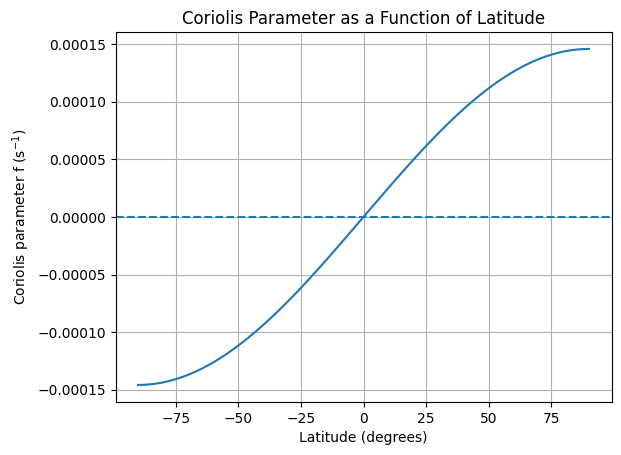

In [ ]:
# Q1(b). Coriolis parameter as a function of latitude

# Define latitudes from -90 to +90 degrees
lat_deg = np.linspace(-90, 90, 181)
lat_rad = np.deg2rad(lat_deg)

# Compute Coriolis parameter f
f = 2 * Omega * np.sin(lat_rad)

# Print some reference values
for phi in [-60, -30, 0, 30, 60]:
    fr = 2 * Omega * np.sin(np.deg2rad(phi))
    print("Latitude {:>3d} deg: f = {:.3e} s^-1".format(phi, fr))

# Plot f versus latitude
plt.figure()
plt.plot(lat_deg, f)
plt.axhline(0.0, linestyle='--')
plt.xlabel("Latitude (degrees)")
plt.ylabel("Coriolis parameter f (s$^{-1}$)")
plt.title("Coriolis Parameter as a Function of Latitude")
plt.grid(True)
plt.show()


### Q1(c). Interpretation

Using the printed values and the plot above:

1. How does the magnitude of \( f \) change from equator to poles?  
2. Why is the Coriolis effect often neglected near the equator for some phenomena?  
3. In 3–4 sentences, comment on how this variation in \( f \) might influence large scale atmospheric circulation.

Write your answer here.


## Q2. Geostrophic Balance

In large scale, slowly varying mid latitude flows away from the equator, the horizontal momentum equations can be approximated by **geostrophic balance**:

\[
f v_g = \frac{1}{\rho} \frac{\partial p}{\partial x}, \qquad
f u_g = -\frac{1}{\rho} \frac{\partial p}{\partial y}
\]

where:

- \( (u_g, v_g) \) are the geostrophic wind components  
- \( p \) is pressure, \( \rho \) is air density  

### Tasks

1. In 3-4 sentences, explain the assumptions under which geostrophic balance holds.  
2. What is the physical meaning of geostrophic wind?  
3. Why is geostrophic balance a good approximation for synoptic scale mid latitude flows?

Write your answers below.


In [ ]:
# Q2(b). Simple geostrophic wind calculation

# Assume a mid-latitude, constant density, simple pressure field:
# p(x, y) = p0 - G * y
# so that dp/dy = -G (constant), dp/dx = 0

rho = 1.25     # kg m^-3, representative air density
G   = 0.5      # Pa per km in y-direction (we will convert to SI units)

# Convert G from Pa/km to Pa/m
G_SI = G / 1000.0

# Choose a fixed latitude, say 45N
lat0_deg = 45.0
lat0_rad = np.deg2rad(lat0_deg)
f0 = 2 * Omega * np.sin(lat0_rad)

print("Latitude = {:.1f} deg, f0 = {:.3e} s^-1".format(lat0_deg, f0))

# Geostrophic wind components:
# f u_g = -(1/rho) dp/dy = (1/rho) G_SI  (because dp/dy = -G_SI)
# f v_g = (1/rho) dp/dx = 0  (because dp/dx = 0)

u_g = (1.0 / rho) * G_SI / f0   # m/s
v_g = 0.0

print("Geostrophic wind components at 45N:")
print("u_g = {:.2f} m/s (positive eastward)".format(u_g))
print("v_g = {:.2f} m/s (positive northward)".format(v_g))


### Q2(c). Direction of Geostrophic Wind

1. In the simple example above, pressure decreases towards positive y.  
   - In the Northern Hemisphere, is the geostrophic wind blowing with low pressure on its left or on its right?  
2. How would the direction change in the Southern Hemisphere (sign of \( f \))?  
3. In your own words (3-4 sentences), explain why geostrophic winds tend to flow **along** isobars rather than directly from high to low pressure.

Write your answer here.


In [ ]:
# Q3. Rossby Number

# Rossby number Ro = U / (f * L)

def rossby_number(U, L, lat_deg):
    """Compute Rossby number for given velocity U [m/s],
    length scale L [m], and latitude lat_deg [degrees]."""
    phi = np.deg2rad(lat_deg)
    f_loc = 2 * Omega * np.sin(phi)
    return U / (f_loc * L)

# Example flows
U_values    = [5.0, 10.0, 20.0]          # m/s
L_values_km = [50.0, 500.0, 2000.0]      # km
latitudes   = [10.0, 30.0, 60.0]         # degrees

print("Rossby numbers for various flows:")
for lat in latitudes:
    for L_km in L_values_km:
        for U in U_values:
            L = L_km * 1000.0
            Ro = rossby_number(U, L, lat)
            print("lat = {:>4.0f} deg, U = {:>4.1f} m/s, L = {:>5.0f} km -> Ro = {:.2f}".format(
                lat, U, L_km, Ro))
    print("-" * 60)


### Q3(b). Interpretation of Rossby Number

Using the printed values above:

1. Identify one example where \( \text{Ro} \ll 1 \). What does this imply about the importance of rotation and the validity of geostrophic balance?  
2. Identify one example where \( \text{Ro} \sim 1 \) or larger. What does this imply about the flow (for example, convection or small scale turbulence)?  
3. In 3-4 sentences, explain why large scale mid latitude weather systems often have small Rossby numbers.

Write your answer below.


In [ ]:
# Q4. Simple inertial oscillation

# At a given latitude, a parcel released with an initial velocity,
# in the absence of pressure gradients and friction, will undergo
# inertial oscillations due to the Coriolis force.

lat_io_deg = 30.0
lat_io_rad = np.deg2rad(lat_io_deg)
f_io = 2 * Omega * np.sin(lat_io_rad)

print("Latitude = {:.1f} deg, f = {:.3e} s^-1".format(lat_io_deg, f_io))

# Inertial period T = 2*pi / |f|
T_inertial = 2 * np.pi / np.abs(f_io)
print("Inertial period T ≈ {:.1f} hours".format(T_inertial / 3600.0))

# Time array covering two inertial periods
t = np.linspace(0, 2 * T_inertial, 500)

# Initial conditions: u(0) = U0, v(0) = 0
U0 = 10.0  # m/s

# Analytical solution for inertial oscillation:
u =  U0 * np.cos(f_io * t)
v = -U0 * np.sin(f_io * t)

# Plot hodograph (v versus u)
plt.figure()
plt.plot(u, v)
plt.xlabel("u (m/s)")
plt.ylabel("v (m/s)")
plt.title("Inertial Oscillation Hodograph at {:.0f}N".format(lat_io_deg))
plt.axis('equal')
plt.grid(True)
plt.show()

# Plot time series of u and v
plt.figure()
plt.plot(t/3600.0, u, label="u")
plt.plot(t/3600.0, v, label="v")
plt.xlabel("Time (hours)")
plt.ylabel("Velocity (m/s)")
plt.title("Inertial Oscillation Time Series at {:.0f}N".format(lat_io_deg))
plt.legend()
plt.grid(True)
plt.show()


### Q4(b). Interpretation of Inertial Oscillations

1. From the plots, describe the motion of the parcel in the horizontal plane.  
2. How does the inertial period depend on latitude? What happens as you move closer to the equator?  
3. In 3-4 sentences, comment on where inertial oscillations might be relevant in the real atmosphere or ocean.

Write your answer here.


## Q5. Connection to Aerosol and Pollutant Transport

In 6-8 sentences, discuss how large scale flow patterns governed by rotation (Coriolis force, geostrophic balance, small Rossby number) can influence:

- Long range transport of dust, smoke, or pollution plumes  
- The shape and movement of aerosol optical depth (AOD) patterns in satellite images  
- Differences between tropical and mid latitude aerosol transport  

You may refer to examples such as:

- Trans boundary haze events  
- Saharan dust transport over the Atlantic  
- Wintertime pollution over the Indo Gangetic Plain  

Write your answer below.


---

# End of Notebook 2

Before proceeding:

- Ensure all code cells run without error  
- All plots are clearly labelled with units  
- All conceptual questions are answered in full sentences  
- Save your work  
- Commit and push your changes  

In **Notebook 3**, you will work more deeply with atmospheric thermodynamics and stability.

---
